**Dataset description** 
- The dataset contains several columns which are as follows -

- age : age in years
- sex : (1 = male; 0 = female)
- cp : chest pain type
- trestbps : resting blood pressure (in mm Hg on admission to the hospital)
- chol : serum cholestoral in mg/dl
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
- thalach : maximum heart rate achieved
- exang : exercise induced angina (1 = yes; 0 = no)
oldpeak : ST depression induced by exercise relative to rest
slope : the slope of the peak exercise ST segment
ca : number of major vessels (0-3) colored by flourosopy
thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
target : 1 or 0

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
Data = pd.read_csv(r"C:\Users\mdreh\Downloads\heart.csv")

In [21]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [23]:
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
len(Data.columns)

14

In [25]:
Data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
Data.shape

(1025, 14)

In [27]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 1. Age Distribution (Histogram)

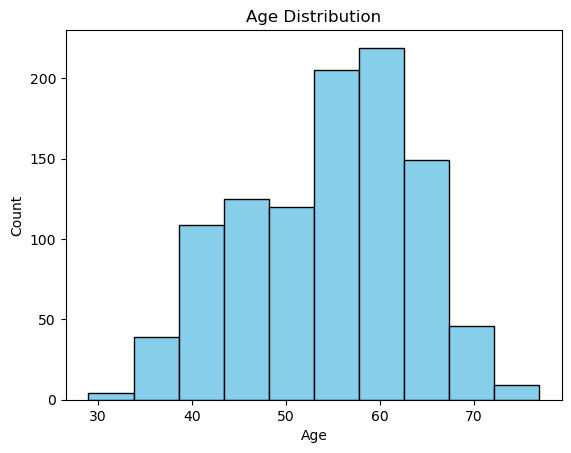

In [28]:
plt.hist(Data['age'],bins = 10 , color = 'skyblue', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


* Most patients in this dataset are between 50 to 60 years old, indicating that middle-aged individuals are more represented in this heart disease dataset.

2. Gender Distribution

In [29]:
gender_count = Data['sex'].value_counts()

In [30]:
gender_count

sex
1    713
0    312
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

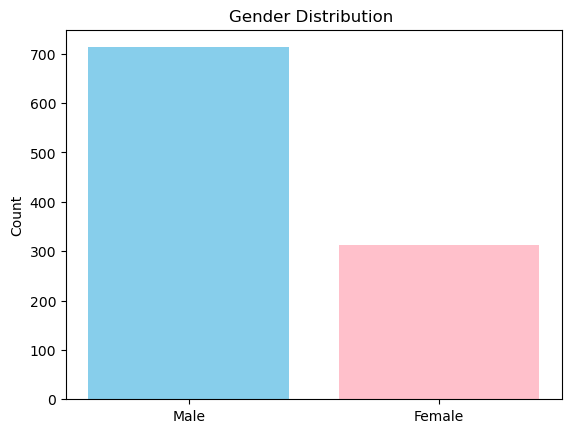

In [31]:
plt.bar(['Male','Female'],gender_count,color=['skyblue','pink'])
plt.title('Gender Distribution ')
plt.ylabel('Count')
plt.show

* The dataset contains more male patients than female patients. This suggests that either males are more likely to be tested for heart disease, or they are more affected in this sample.

3. Target (Heart Disease)

In [32]:
target_counts = Data['target'].value_counts()

In [33]:
target_counts

target
1    526
0    499
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

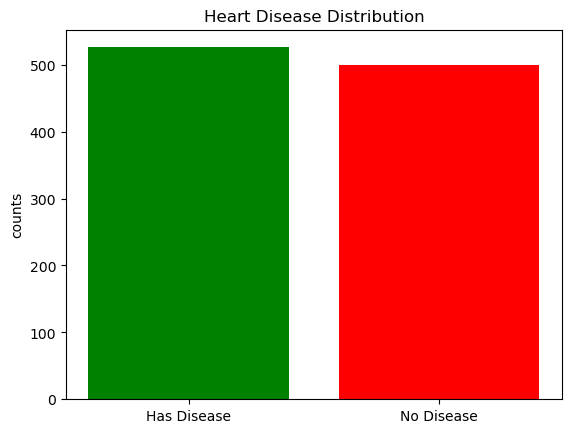

In [34]:
plt.bar(['Has Disease','No Disease'],target_counts,color=['green','red'])
plt.title('Heart Disease Distribution')
plt.ylabel('counts')
plt.show

* The dataset shows that a higher number of patients have heart disease (target = 1) compared to those who don’t. This indicates that the dataset is slightly imbalanced, with more positive cases, which can help in analyzing factors leading to heart disease.



4: Bivariate Analysis (Comparing Two Features)

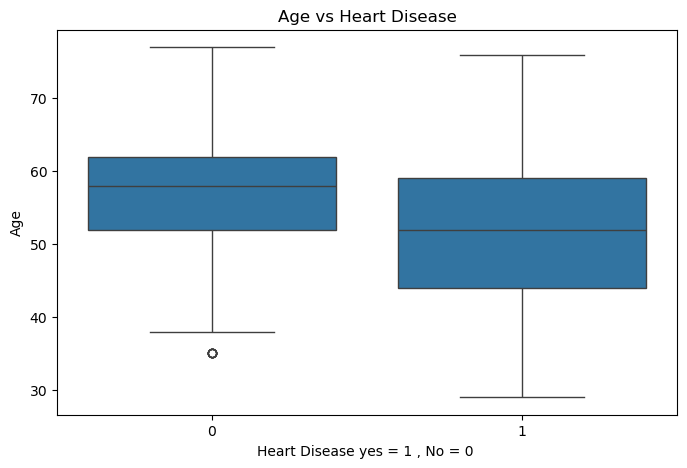

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target',y='age',data=Data)
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease yes = 1 , No = 0 ')
plt.ylabel('Age')
plt.show()

* The boxplot shows that patients with heart disease (target = 1) have a slightly lower median age than those without the disease (target = 0).


* Most heart disease cases fall in the age range of 50 to 60 years, while patients without heart disease have a slightly wider age spread.

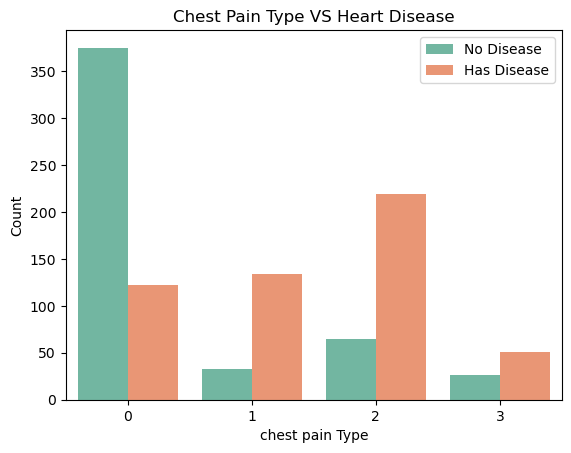

In [36]:
sns.countplot(x='cp' , hue='target' ,data= Data , palette='Set2')
plt.title('Chest Pain Type VS Heart Disease')
plt.xlabel('chest pain Type')
plt.ylabel('Count')
plt.legend(['No Disease','Has Disease'])
plt.show()
        

* The plot shows that asymptomatic chest pain (type 3) is more common among patients without heart disease, while chest pain types 1 and 2 (atypical and non-anginal) are more frequently associated with heart disease (target = 1).


In [48]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [49]:
corr = Data.corr(numeric_only=True)

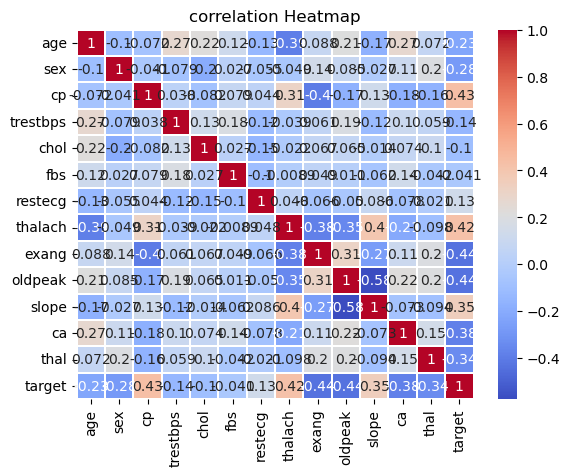

In [50]:
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.15)
plt.title('correlation Heatmap')
plt.show()

**Maximum Heart Rate (thalach) vs Heart Disease**

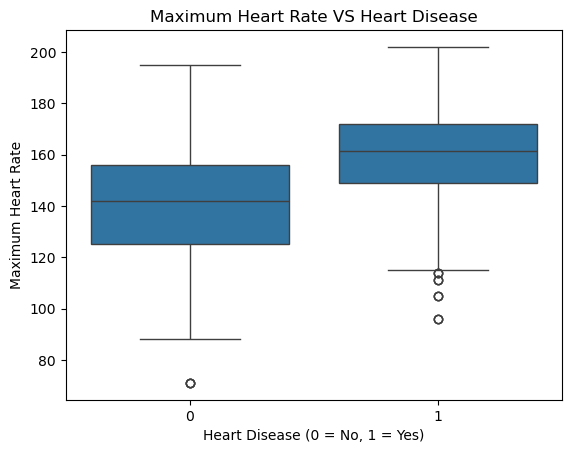

In [55]:
sns.boxplot(x='target' , y='thalach' , data=Data)
plt.title('Maximum Heart Rate VS Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate')
plt.show()

* This could indicate that patients with heart disease in this dataset reached higher heart rates, possibly due to stress or medical testing conditions.

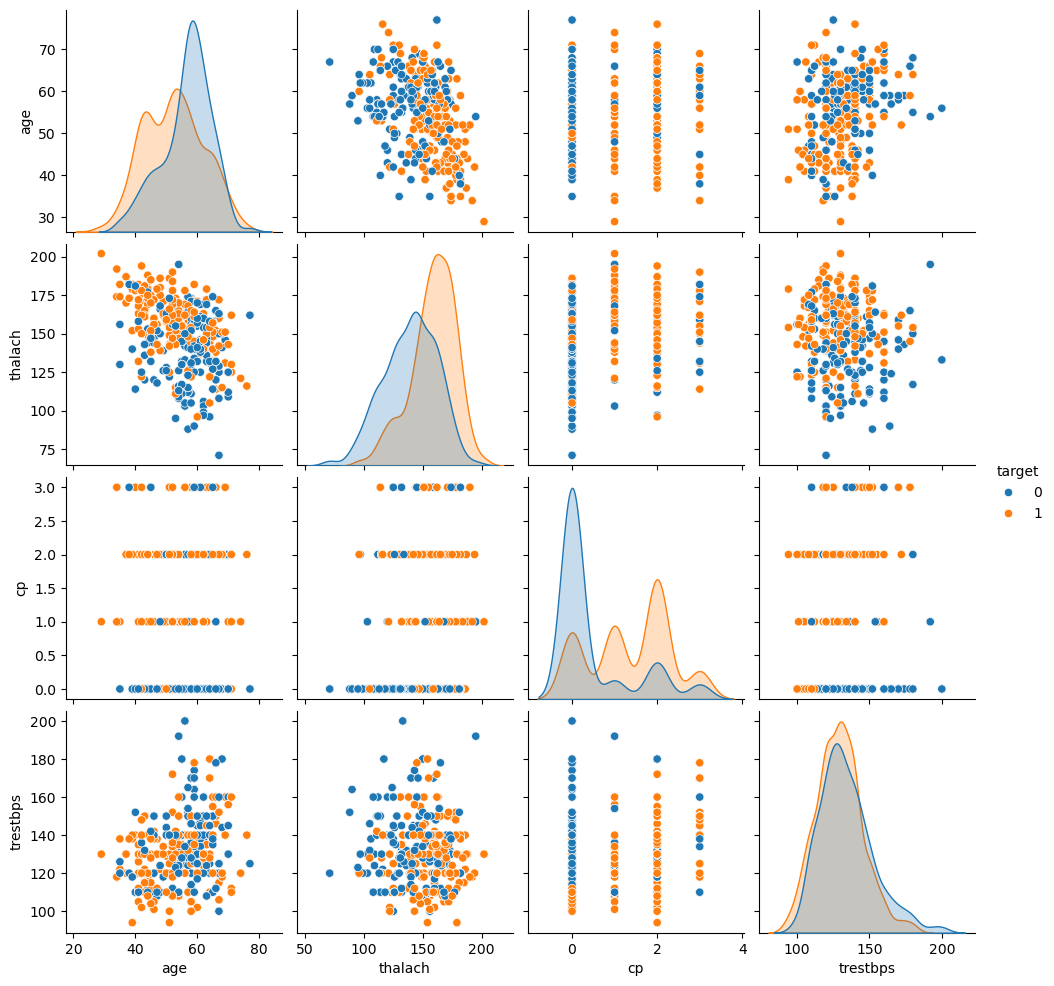

In [58]:
sns.pairplot(Data[['age', 'thalach', 'cp', 'trestbps', 'target']], hue='target')
plt.show()

In [61]:
label = ['Male','Female']
sizes = Data['sex'].value_counts().values
colors = ['skyblue','lightcoral']
explode = [0.05,0]


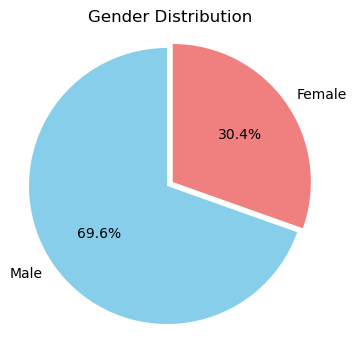

In [67]:
plt.figure(figsize=(4,4))
plt.pie(sizes,colors=colors,explode=explode,autopct='%1.1f%%',startangle=90,labels=label)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

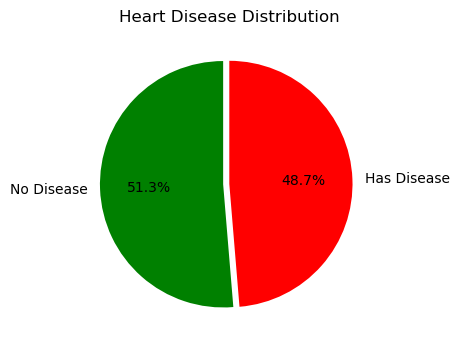

In [72]:
plt.figure(figsize=(4,4))
plt.pie(Data['target'].value_counts().values , explode = [0.05,0] , autopct='%1.1f%%' , startangle=90 ,colors=['green','red'],labels=['No Disease','Has Disease']
       )
plt.title('Heart Disease Distribution')
plt.axis=('equal')
plt.show()


**Conclusion**